In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import pickle


In [24]:
df = pd.read_csv('main_data.csv')

econ_data = df[[
'Date', 'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
'GloUranium', 'GloPalmOil', 'GloBrentCrude', 'Real_Estate_Loans', 'SP500',
'Dow_Jones_Target', 'NASDAQ', 'Federal_Debt'
]]



### Train Test Split

In [25]:
# exog = econ_data[['Date','GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ', 'ExpGoServ',
#        'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat', 'GloUranium',
#        'GloPalmOil', 'Real_Estate_Loans', 'SP500', 'NASDAQ',
#        'Federal_Debt']]

exog = econ_data[['GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ', 'ExpGoServ',
       'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat', 'GloUranium',
       'GloPalmOil', 'Real_Estate_Loans', 'SP500', 'NASDAQ',
       'Federal_Debt']]

In [26]:
# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(econ_data) * 0.85)
train, test = econ_data[:train_size], econ_data[train_size:]

# Split the exogenous variables if applicable
train_exog, test_exog = exog[:train_size], exog[train_size:]

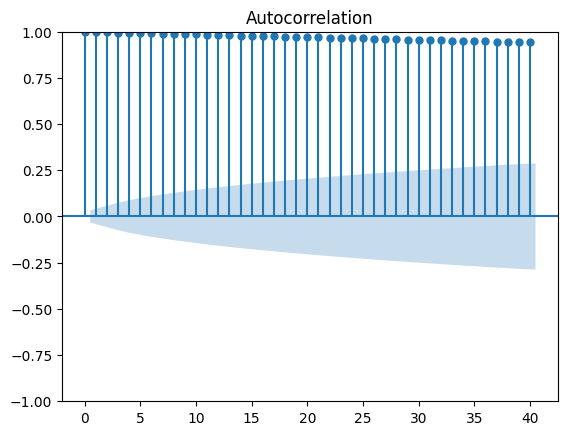

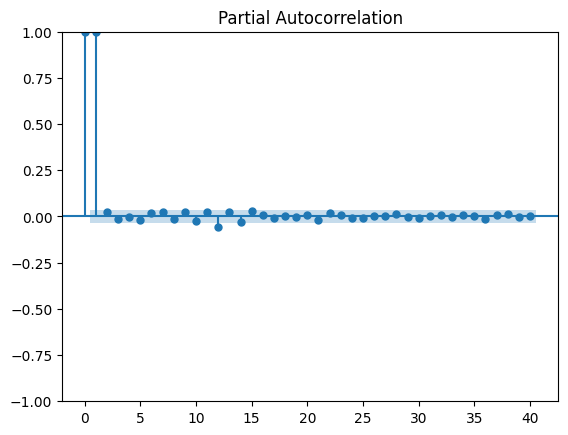

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(econ_data['Dow_Jones_Target'], lags=40)
plot_pacf(econ_data['Dow_Jones_Target'], lags=40)
plt.show()

### SARIMAX 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Step 1: Load data
df = pd.read_csv('main_data.csv')

# Step 2: Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 3: Select relevant columns
econ_data = df[[
    'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ', 'ExpGoServ', 'Unempl', 
    'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat', 'GloUranium', 'GloPalmOil', 
    'Real_Estate_Loans', 'SP500', 'Dow_Jones_Target', 'NASDAQ', 'Federal_Debt'
]]

# Step 4: Define exogenous variables (without 'Date')
exog = econ_data[['GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ', 'ExpGoServ', 
                  'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat', 'GloUranium', 
                  'GloPalmOil', 'Real_Estate_Loans', 'SP500', 'NASDAQ', 'Federal_Debt']]

# Step 5: Split data into training and test sets (85% train, 15% test)
train_size = int(len(econ_data) * 0.85)
train, test = econ_data[:train_size], econ_data[train_size:]

# Split the exogenous variables
train_exog, test_exog = exog[:train_size], exog[train_size:]

In [7]:
# Step 6: Fit SARIMAX model (using the best model from your previous tests)
#model_sarimax = SARIMAX(train['Dow_Jones_Target'], exog=train_exog, order=(2, 1, 2), seasonal_order=(3, 1, 1, 4))
#model = SARIMAX(train['Dow_Jones_Target'], exog=train_exog, order=(2, 1, 3), seasonal_order=(3, 1, 1, 80)) #MAE: 2421.9170729942966 MAPE: 6.79215778437978%
#model = SARIMAX(train['Dow_Jones_Target'], exog=train_exog, order=(2, 1, 3), seasonal_order=(3, 1, 1, 140)) #kernel crashed
#model_sarimax = SARIMAX(train['Dow_Jones_Target'], exog=train_exog, order=(2, 1, 3), seasonal_order=(3, 1, 1, 98)) #MAE: 1139.1693786540463 MAPE: 3.182627073760702% Time: 146min
model_sarimax = SARIMAX(train['Dow_Jones_Target'], exog=train_exog, order=(2, 1, 3), seasonal_order=(3, 1, 1, 99))#MAE: 1122.238460704921 MAPE: 3.133114236535185%; time 157min

# Step 7: Fit the model
model_fit_sarimax = model_sarimax.fit()

# Step 8: Forecast using the test set
forecast = model_fit_sarimax.get_forecast(steps=len(test), exog=test_exog)

# Step 9: Extract forecasted values
forecast_values = forecast.predicted_mean

/Users/maxquarder/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/maxquarder/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33374D+00    |proj g|=  5.41432D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   27      1     20      1     0     0   5.414D+00   5.334D+00
  F =   5.3337354869267335     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test['Dow_Jones_Target'], forecast_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(test['Dow_Jones_Target'], forecast_values)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAPE
mape = mean_absolute_percentage_error(test['Dow_Jones_Target'], forecast_values)
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')


Mean Absolute Error (MAE): 1122.238460704921
Mean Squared Error (MSE): 1968998.689317447
Root Mean Squared Error (RMSE): 1403.2101372629286
Mean Absolute Percentage Error (MAPE): 3.13%


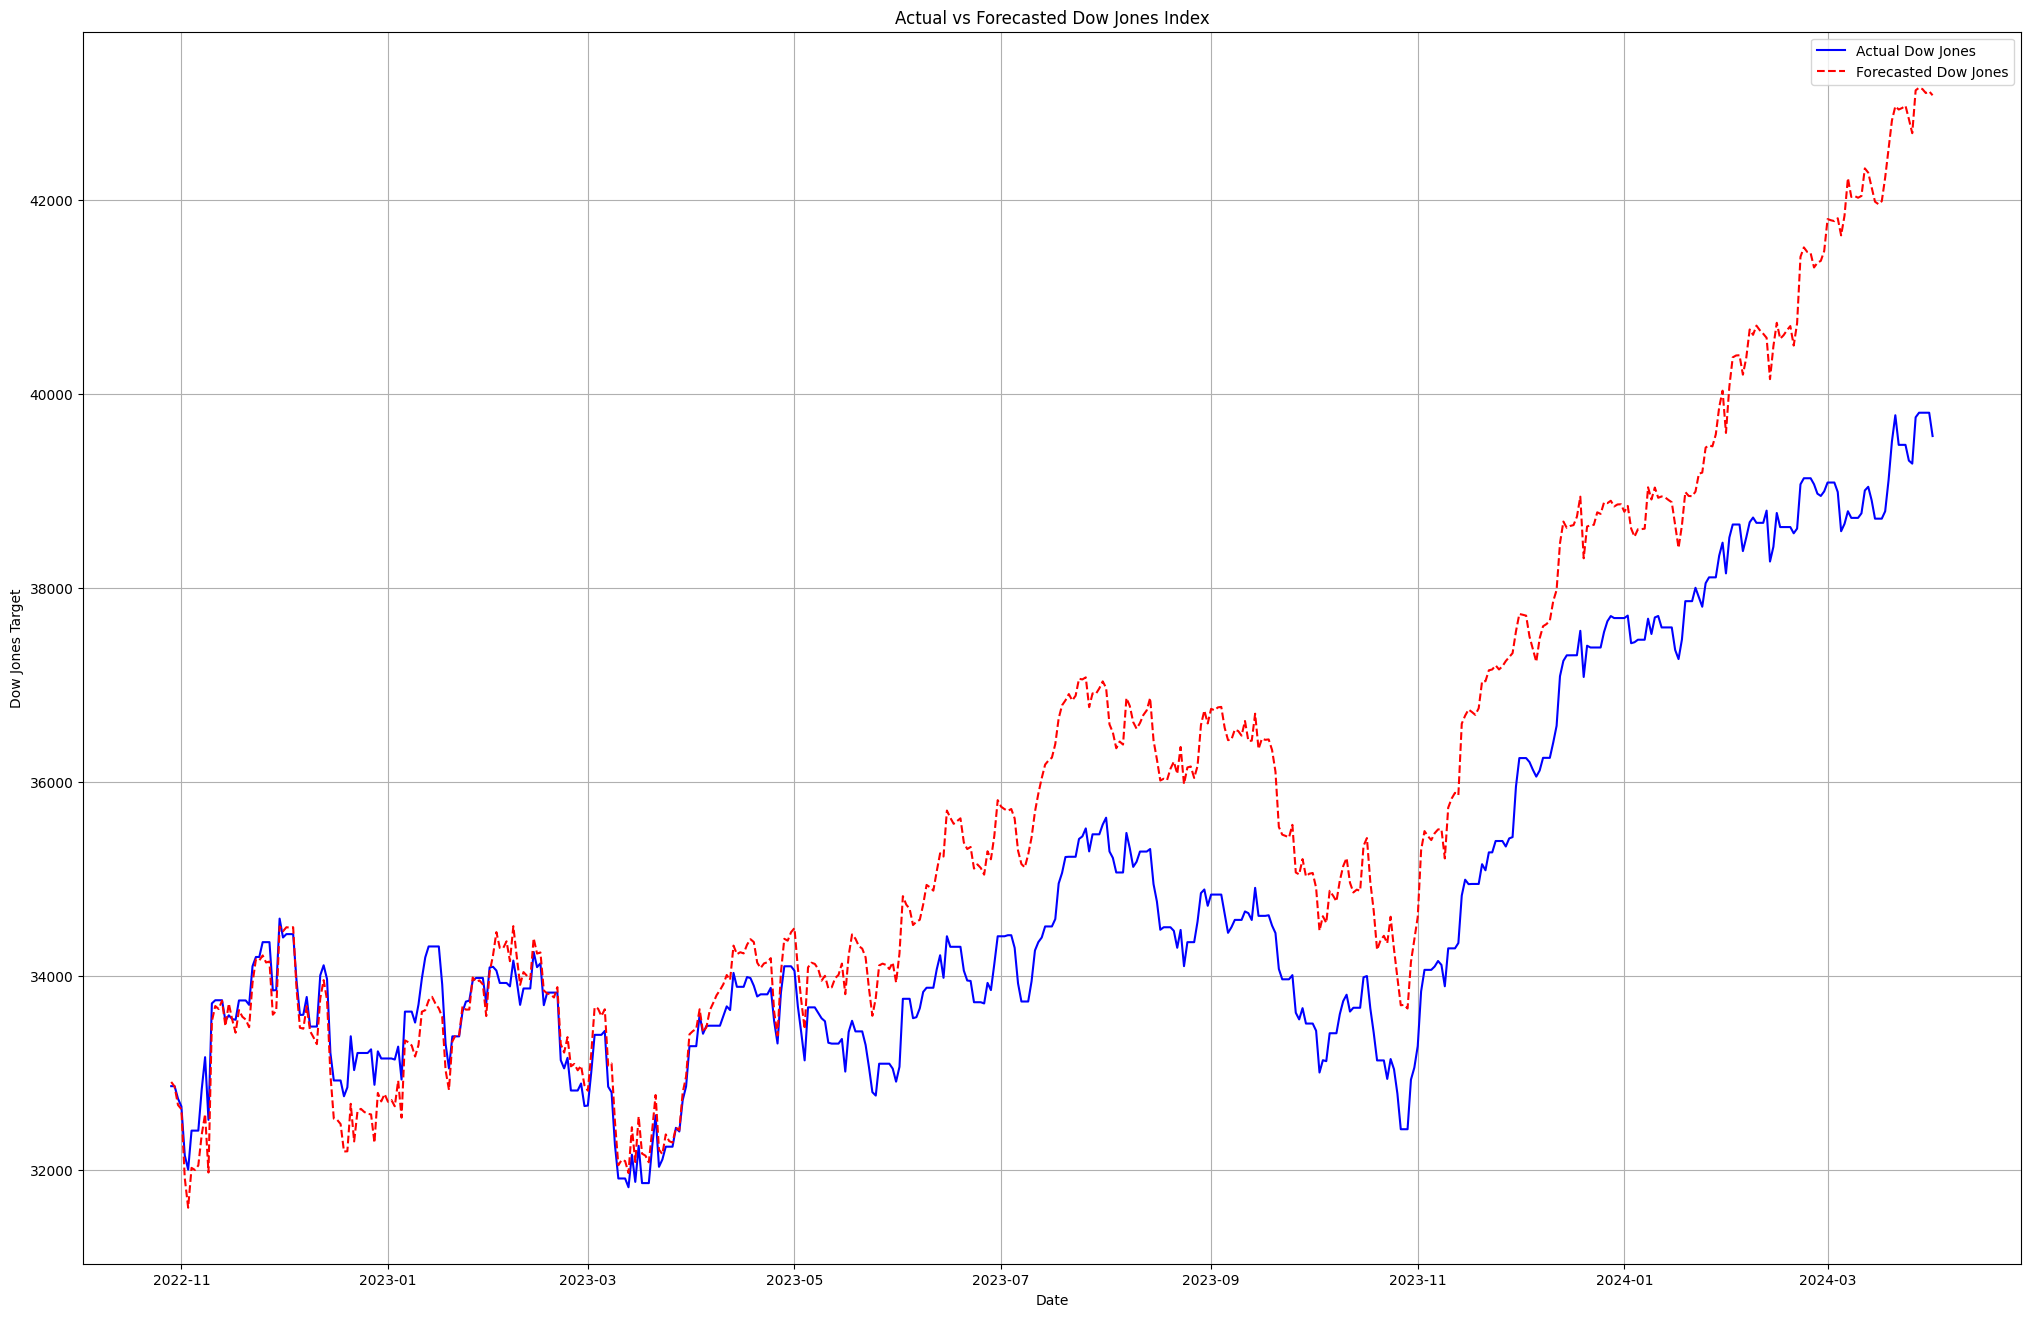

MAE: 1122.238460704921
MAPE: 3.133114236535185%


In [8]:

# Step 10: Plot actual vs forecasted values
plt.figure(figsize=(25, 16))

# Plot actual Dow Jones values
plt.plot(test.index, test['Dow_Jones_Target'], label='Actual Dow Jones', color='blue')

# Plot forecasted Dow Jones values
plt.plot(test.index, forecast_values, label='Forecasted Dow Jones', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Dow Jones Target')
plt.title('Actual vs Forecasted Dow Jones Index')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_forecasted_dow_jones_SARIMAX.pdf', format='pdf')
# Display the plot
plt.show()

# Step 11: Evaluate model performance (MAE and MAPE)
mae = mean_absolute_error(test['Dow_Jones_Target'], forecast_values)
print(f'MAE: {mae}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['Dow_Jones_Target'], forecast_values)
print(f'MAPE: {mape}%')
